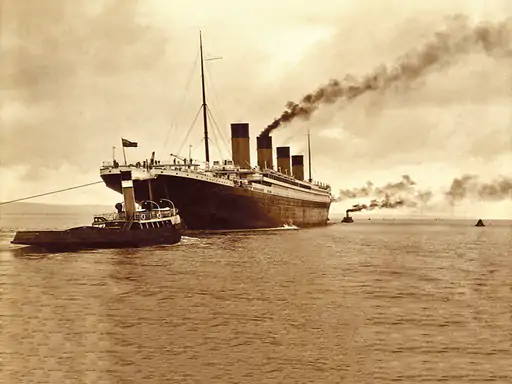

In this project, we learned to manipulate data using Pandas and conduct exploratory data analysis (EDA) to uncover insights. We applied logistic regression for predictive modeling and gained experience in evaluating model performance. Overall, we enhanced our understanding of data-driven decision-making and the practical applications of machine learning.

DAta Analysis large projects

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r"E:\data science with python & ai\python\titanic 03-03-24 by sanket data.csv")
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we can see in "Age", "Cabin" and "Embarked" missing value. we need to remove it. using fillna function.

In [7]:
df.fillna(df["Age"].mean(),inplace=True)

In [8]:
df.fillna(df[["Cabin","Embarked"]].mode(),inplace=True) 

In [9]:
df.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


in the titanic columns used float,int and object datatype.

In [11]:
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


by using describe function

In [12]:
df.drop(df[["PassengerId","Ticket","Name"]],axis=1,inplace=True) 

In [13]:
df.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,29.699118,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,29.699118,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,29.699118,S


 The dataset includes passenger details such as survival status, class, sex, age, and fare. 
The Survived column shows whether a passenger survived (1) or not (0). This data provides 
insights into survival rates across different classes and genders.

In [14]:
df.rename(columns={"SibSp":"Siblings","Pclass":"Pessenger_class","Parch":"Perents","Fare":"price_ticket","Sex":"Gender"},inplace=True)

In [15]:
df.head() 

,Survived,Pessenger_class,Gender,Age,Siblings,Perents,price_ticket,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,29.699118,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,29.699118,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,29.699118,S


## Total number of Pessenger in titanic

In [16]:
Total_pessenger = df["Gender"].value_counts().sum()  
Total_pessenger

np.int64(891)

## count the males and females in titanic ?

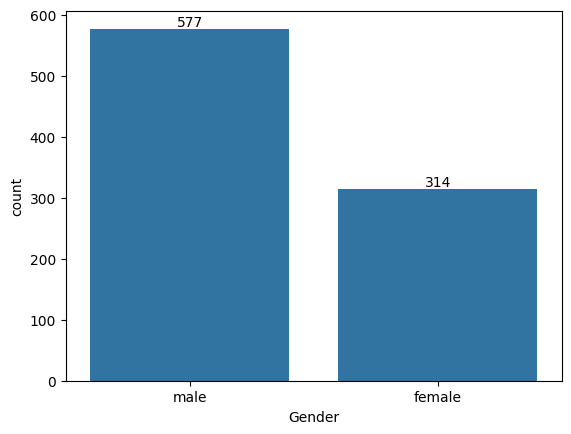

In [17]:
ax = sns.countplot(x="Gender",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

## Number of pessenges class_wise 

In [18]:
pessenger_class = df["Pessenger_class"].value_counts()
pessenger_class 

Pessenger_class
3    491
1    216
2    184
Name: count, dtype: int64

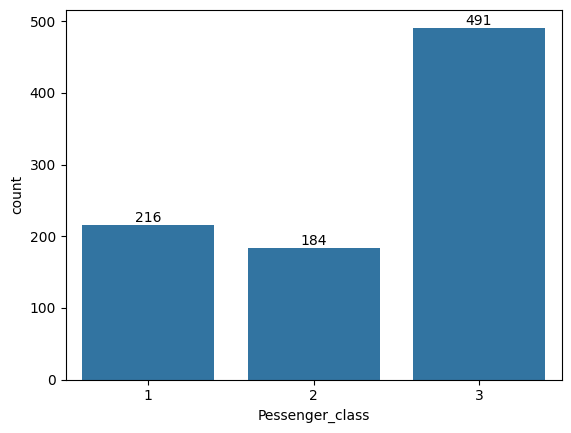

In [19]:
ax = sns.countplot(x = "Pessenger_class",data=df)
for bars in ax.containers: 
    ax.bar_label(bars) 

## number of pessengers servived or not 

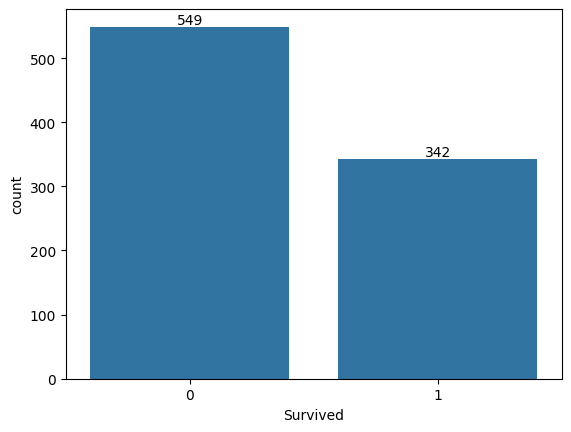

In [20]:
ax = sns.countplot(x="Survived",data=df) 
for bars in ax.containers: 
    ax.bar_label(bars) 

# Gender wise servived males and females

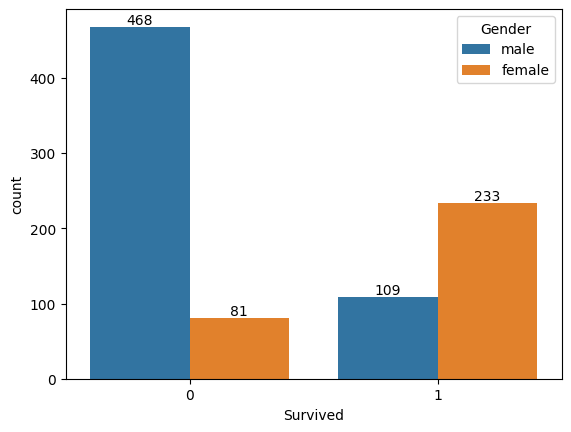

In [21]:
ax =sns.countplot(data=df,x = "Survived",hue="Gender")
for bars in ax.containers:
    ax.bar_label(bars) 

## servived pessenger with pessenger_class

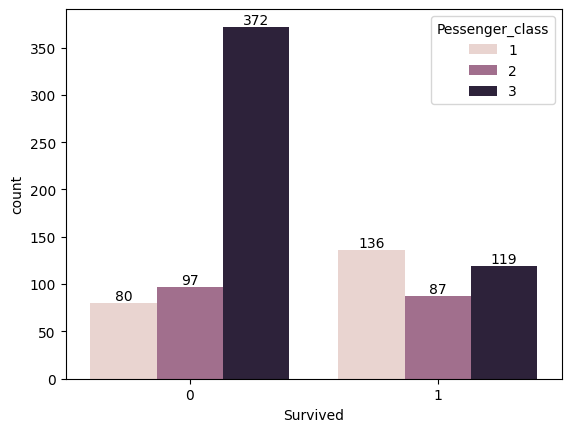

In [22]:
ax = sns.countplot(data=df,x="Survived",hue="Pessenger_class") 
for bars in ax.containers: 
    ax.bar_label(bars) 

## pessenger_class with Gender wise 

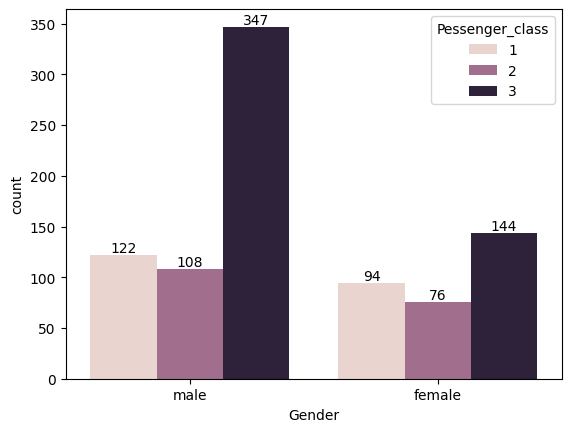

In [53]:
ax = sns.countplot(data=df,x="Gender",hue="Pessenger_class") 
for bars in ax.containers: 
    ax.bar_label(bars) 

## By Age graph 

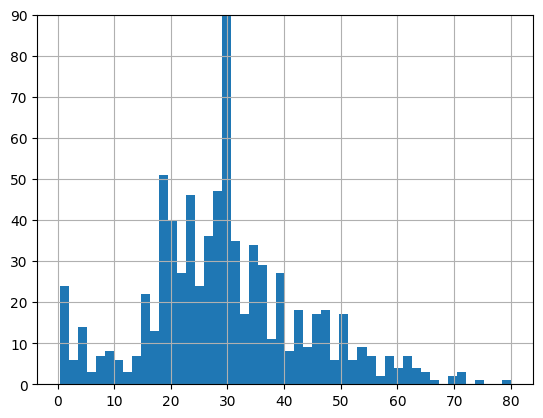

In [54]:
df["Age"].hist(bins=50)
plt.ylim([0,90])
plt.show() 

## servived sibling wise 

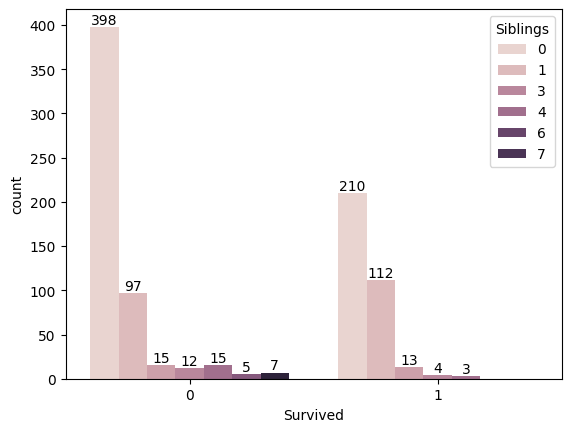

In [55]:
ax = sns.countplot(data=df,x="Survived",hue="Siblings")
for bars in ax.containers: 
    ax.bar_label(bars) 

## servived with Embarked

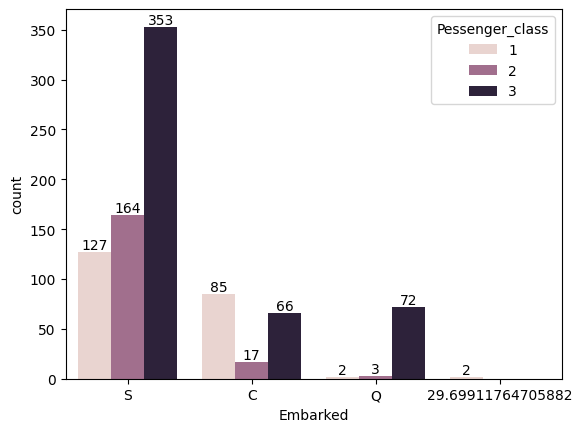

In [56]:
ax = sns.countplot(data=df,x="Embarked",hue="Pessenger_class")
for bars in ax.containers: 
    ax.bar_label(bars)
plt.show() 


## Age mean pessenger_class wise 

In [57]:
Age_wise_mean = df.groupby(by="Pessenger_class")["Age"].mean() 
Age_wise_mean 

Pessenger_class
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

Modling

separate features and target variable

In [29]:
df.columns

Index(['Survived', 'Pessenger_class', 'Gender', 'Age', 'Siblings', 'Perents',
       'price_ticket', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
x = df.drop("Survived",axis=1)
y = df["Survived"]

handle categorical variable (lable encoder)

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x["Gender"]=le.fit_transform(x["Gender"]) 

one hot encoding

In [60]:
x=pd.get_dummies(x,columns=["Embarked"],drop_first=True)

feature scalling 

In [61]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x[["Gender","Embarked_C","Embarked_Q","Embarked_S"]] = scalar.fit_transform(x[["Gender","Embarked_C","Embarked_Q","Embarked_S"]]) 


Train - test split the data 

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

-- Model selection (for the binary classification include),logistic regration,decision trees,random forest,support vector machine(svm) ,gradient boosting machines(xgboost)

we are using logistic rtegration

In [65]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(max_iter=200) 
model.fit(x_train,y_train) 

LogisticRegression(max_iter=200)

model evaluation (prediction)

In [67]:
y_pred = model.predict(x_test) 
y_pred 

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred)) 


[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

